In [2]:
#Analysis Model(JH)
!pip install rembg==1.0.10

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.9 MB 4.9 MB/s 
     |████████████████████████████████| 12.5 MB 23.6 MB/s 
     |████████████████████████████████| 2.2 MB 51.4 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
     |████████████████████████████████| 61 kB 419 kB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 14.5 MB 35.3 MB/s 
  Created wheel for rembg: filename=rembg-1.0.10-py3-none-any.whl size=10916 sha256=9194e684736dd7a5b2e719c2b2a87f662fbc0d3a78452fe5703309135a23889f
  Stored in directory: /root/.cache/pip/wheels/94/46/2c/0809f1587a2584b0ff940bce961fc7b40993fab72466c82ca8
Successfully built rembg
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
 

In [3]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 12 kB/s 
     |████████████████████████████████| 47.6 MB 35.2 MB/s 


In [4]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13676, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 13676 (delta 10), reused 10 (delta 4), pack-reused 13647
Receiving objects: 100% (13676/13676), 12.14 MiB | 26.57 MiB/s, done.
Resolving deltas: 100% (9551/9551), done.


In [5]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 215 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0
    Uninstalling torch-1.6.0:
      Successfully uninstalled torch-1.6.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.7.0
    Uninstalling torchvision-0.7.0:
      Successfully uninstalled torchvision-0.7.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rembg 1.0.10 requires torch==1.6.0, but you have torch 1.11.0 which is incompatible.
rembg 1.0.10 requires torchvision==0.7.0, but you have torchvision 0.12.0 which is

/content/yolov5
detect: weights=['/content/gdrive/MyDrive/Colab/yolov5/pill_yolo.pt'], source=/content/gdrive/MyDrive/Testing/4.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-211-gcee5959 Python-3.7.13 torch-1.11.0+cu102 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/1 /content/gdrive/MyDrive/Testing/4.jpg: 416x320 1 pill, Done. (0.141s)
Speed: 0.9ms pre-process, 140.8ms inference, 0.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp4
/content


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


[Case1.제형] n각형 분석 : 6각형


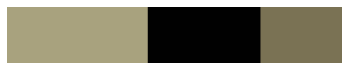

[Case3.색상] 색상 분석(R,G,B)
[Case3-1.색상] 색상 분석(빨간색, R) : 168
[Case3-2.색상] 색상 분석(초록색, G) : 162
[Case3-3.색상] 색상 분석(파란색, B) : 126


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[Case4.OCR] OCR 분석 결과 : 
[Case5.최종 분석결과] : ['장방형', '노랑', '']


In [133]:
from glob import glob
from PIL import Image
from rembg.bg import remove
from IPython.display import Image
from sklearn.cluster import KMeans
from collections import OrderedDict
from google.colab.patches import cv2_imshow
import cv2
import os
import easyocr
import easydict
import argparse
import numpy as np
import matplotlib.pyplot as plt

result = []

def yoloExe(img):
    # %cd /content/yolov5/
    %cd /content/yolov5/
    img_list = glob(img)

    val_img_path = img_list[0]

    # weights_path = '/content/pill_yolo.pt'
    weights_path = '/content/gdrive/MyDrive/Colab/yolov5/pill_yolo.pt'

    !python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}" --line-thickness 1 --save-crop

    detect_img_path = img
    Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))

def setLabel(img, pts, label): #비율 계산에 사용되는 레이블 함수
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 255, 0), 2)
    cv2.putText(img, label, (pt1[0], pt1[1]-3), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255))

def rmBg(path):
    input_path = path
    output_path = 'rmbg.jpg'

    with open(input_path, 'rb') as i:
        with open(output_path, 'wb') as o:
            input = i.read()
            output = remove(input)
            o.write(output)
    return '/content/rmbg.jpg'

def binary(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, dst = cv2.threshold (gray, 155, 255, cv2.THRESH_BINARY)
    cv2.imwrite("/content/binary.jpg", dst)

    img = cv2.imread("/content/binary.jpg")
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    # 침식 연산 적용 ---②
    dilate = cv2.dilate(img, k)

    #cv2_imshow(erosion)
    cv2.imwrite("/content/dilate.jpg", dilate)
    return '/content/dilate.jpg'

def reverse(path): #이진화된 이미지 반전시키는 함수
    img = cv2.imread(path)
    out = img.copy()
    out = 255 - out
    cv2.imwrite("/content/pill.jpg", out)
    return '/content/pill.jpg'

def cont(path): #원, 타원, 장방형의 각형을 알려주는 함수
    img = cv2.imread(path)
    img2 = img.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cnt = contours[0]
    cv2.drawContours(img, [cnt], -1, (255, 255, 0), 2)

    epsilon2 =  0.005 * cv2.arcLength(cnt, True)
    approx2 = cv2.approxPolyDP(cnt, epsilon2, True)
    cv2.drawContours(img2, [approx2], -1, (0, 255, 0), 3)

    print("[Case1.제형] n각형 분석 : "+str(len(approx2))+"각형")
    #detect(path)
    #print(len(approx2))
    if len(approx2) == 16: #16각형이면 detect함수 실행
        detect(path)
    else: #16각형이 아니면 장방형
        #print("장방형")
        result.append("장방형")

def detect(path): #가로세로 비율을 통해 원인지 타원인지 분류하는 함수
    src = cv2.imread(reverse(path))
    dst = src.copy()

    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    ret, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)

    contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    for i in contours:
        M = cv2.moments(i)
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])
        
        cv2.circle(dst, (cX, cY), 3, (0, 0, 255), -1)
        cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)

        setLabel(dst, i, '')
        (x, y, w, h) = cv2.boundingRect(i)
        
    if (h/w) > 0.95 and (h/w) < 1.05: #비율이 0.95와 1.05사이이면 원 출력
        #print("원형")
        result.append("원형")
        print("[Case2.비율] 비율 분석(세로/가로 비율) : "+str(h/w))
    else: #그렇지 않으면 타원 출력
        #print("타원형")
        result.append("타원형")
        print("[Case2.비율] 비율 분석(세로/가로 비율) : "+str(h/w))

def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)

	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()

	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0

	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

def first_largest_number(arr):
    unique_nums = set(arr)
    sorted_nums = sorted(unique_nums, reverse=True)
    return sorted_nums[0]  

def second_largest_number(arr):
    unique_nums = set(arr)
    sorted_nums = sorted(unique_nums, reverse=True)
    return sorted_nums[1]

'그레이 스케일'
def mtjin_bgr2gray(bgr_img):
    # BGR 색상값
    b = bgr_img[:, :, 0]
    g = bgr_img[:, :, 1]
    r = bgr_img[:, :, 2]
    result = ((0.299 * r) + (0.587 * g) + (0.114 * b))
    # imshow 는 CV_8UC3 이나 CV_8UC1 형식을 위한 함수이므로 타입변환
    return result.astype(np.uint8)

'히스토그램 평활화'
def histogram_equalization(img):
  src = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  dst = cv2.equalizeHist(src)
  #cv2_imshow(dst)
  cv2.imwrite("histogram_eq.jpg", dst)

'노이즈 제거(OCR)'
def rm_noise(img):
  src = cv2.imread(img, cv2.IMREAD_COLOR)
  denoised_img = cv2.fastNlMeansDenoisingColored(src, None, 15, 15, 5, 10)
  #cv2_imshow(src)
  #cv2_imshow(denoised_img)
  cv2.imwrite("denoise.jpg", denoised_img)

'노이즈 제거(제형)'
def rm_noise2(img):
  src = cv2.imread(img, cv2.IMREAD_COLOR)
  denoised_img = cv2.fastNlMeansDenoisingColored(src, None, 15, 15, 5, 10)
  #cv2_imshow(src)
  #cv2_imshow(denoised_img)
  cv2.imwrite("denoise2.jpg", denoised_img)

'OCR'
def ocr(img):
  reader = easyocr.Reader(['ko', 'en'])
  output = reader.readtext(img, detail = 0)
  joined_str = "".join(output) 
  #print(joined_str)
  result.append(joined_str)
  print("[Case4.OCR] OCR 분석 결과 : "+joined_str)

def main(): #메인함수
    #제형 구하는 부분
    yoloExe("/content/gdrive/MyDrive/Testing/4.jpg") #YOLO 함수 호출 #이미지 경로에 사용자가 촬영, 선택한 이미지 경로 넣어야함
    %cd /content
    # rm_path = rmBg('/content/yolov5/runs/detect/exp/crops/pill/원형알약.jpg') #배경제거 함수 호출
    rm_path = rmBg('/content/yolov5/runs/detect/exp4/crops/pill/4.jpg') #배경제거 함수 호출
    first_path = binary(rm_path)
    second_path = binary(first_path)
    third_path = binary(second_path)
    fourth_path = binary(third_path)
    cont(fourth_path)
    #reverse('/content/binary.png')

    #색상 구하는 부분
    args = easydict.EasyDict({
        "image": True,
        "clusters": 3
    })

    image = cv2.imread(rm_path) #이미지 경로에 rm_path 넣어야함
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #plt.figure()
    #plt.axis("off")
    #plt.imshow(image)

    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # cluster the pixel intensities
    clt = KMeans(n_clusters = args["clusters"])
    clt.fit(image)

    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)

    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

    temp = clt.cluster_centers_
    color_value = temp.astype("uint8").tolist() #세 컬러의 rgb값
    second_num = second_largest_number(hist) #히스토그램에서 두 번째로 큰 값(두 번째 색)

    for i in range(3): #두 번째로 큰 값의 인덱스를 구함
      if (second_num == hist[i]):
        color_idx = i

    if((color_value[color_idx][0] < 20) and (color_value[color_idx][1]) < 20 and (color_value[color_idx][2] < 20)):
      first_num = first_largest_number(hist)
      for i in range(3): #첫 번째로 큰 값의 인덱스를 구함
        if (first_num == hist[i]):
          color_idx = i
    
    #print(color_value[color_idx])

    if (color_value[color_idx][0] > 190) and (color_value[color_idx][1] > 190) and (color_value[color_idx][2] > 190):
      #print("하양")
      result.append("하양")
    elif (color_value[color_idx][0] < 50) and (color_value[color_idx][1] < 50) and (color_value[color_idx][2] < 50):
      #print("검정")
      result.append("검정")
    elif (abs(color_value[color_idx][0] - color_value[color_idx][1]) < 20) and (abs(color_value[color_idx][0] - color_value[color_idx][1]) < abs(color_value[color_idx][1] - color_value[color_idx][2])):
      #print("노랑")
      result.append("노랑")
    elif (abs(color_value[color_idx][0] - color_value[color_idx][2]) < 20):
      #print("분홍")
      result.append("분홍")
    elif (color_value[color_idx][0] > color_value[color_idx][1]) and (color_value[color_idx][0] > color_value[color_idx][2]):
      #print("빨강 계열")
      result.append("빨강 계열")
    elif (color_value[color_idx][1] > color_value[color_idx][0]) and (color_value[color_idx][1] > color_value[color_idx][2]):
      #print("녹색 계열")
      result.append("녹색 계열")
    elif (color_value[color_idx][2] > color_value[color_idx][0]) and (color_value[color_idx][2] > color_value[color_idx][1]):
      #print("파랑 계열")
      result.append("파랑 계열")

    print("[Case3.색상] 색상 분석(R,G,B)")  
    print("[Case3-1.색상] 색상 분석(빨간색, R) : "+str(color_value[color_idx][0]))
    print("[Case3-2.색상] 색상 분석(초록색, G) : "+str(color_value[color_idx][1]))    
    print("[Case3-3.색상] 색상 분석(파란색, B) : "+str(color_value[color_idx][2]))

    #텍스트 구하는 부분
    input_img = cv2.imread(rm_path, cv2.IMREAD_COLOR) #이미지 경로 변경 #이미지 경로에 rm_path 넣어야함
    bgr_img = mtjin_bgr2gray(input_img)
    #cv2_imshow(bgr_img)
    cv2.imwrite("gray.jpg", bgr_img)
    histogram_equalization("/content/gray.jpg")
    rm_noise("/content/histogram_eq.jpg")
    rm_noise("/content/histogram_eq.jpg")
    rm_noise("/content/denoise.jpg")
    rm_noise("/content/denoise.jpg")
    rm_noise("/content/denoise.jpg")
    rm_noise("/content/denoise.jpg")
    rm_noise("/content/denoise.jpg")
    ocr("/content/denoise.jpg")

    print("[Case5.최종 분석결과] : "+str(result))

if __name__ == "__main__":
	  main()

In [ ]:
#제형과 비율만 분석하는 모델

from glob import glob
from PIL import Image
from rembg.bg import remove
from IPython.display import Image
from sklearn.cluster import KMeans
from collections import OrderedDict
from google.colab.patches import cv2_imshow
import cv2
import os
import easyocr
import easydict
import argparse
import numpy as np
import matplotlib.pyplot as plt

result = []

def yoloExe(img):
    # %cd /content/yolov5/
    %cd /content/yolov5/
    img_list = glob(img)

    val_img_path = img_list[0]

    # weights_path = '/content/pill_yolo.pt'
    weights_path = '/content/gdrive/MyDrive/Colab/pill_yolo.pt'

    !python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}" --line-thickness 1 --save-crop

    detect_img_path = img
    Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))

def setLabel(img, pts, label): #비율 계산에 사용되는 레이블 함수
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 255, 0), 2)
    cv2.putText(img, label, (pt1[0], pt1[1]-3), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255))

def rmBg(path):
    input_path = path
    output_path = 'rmbg.jpg'

    with open(input_path, 'rb') as i:
        with open(output_path, 'wb') as o:
            input = i.read()
            output = remove(input)
            o.write(output)
    return '/content/rmbg.jpg'

def binary(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, dst = cv2.threshold (gray, 155, 255, cv2.THRESH_BINARY)
    cv2.imwrite("/content/binary.jpg", dst)

    img = cv2.imread("/content/binary.jpg")
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    # 침식 연산 적용 ---②
    dilate = cv2.dilate(img, k)

    #cv2_imshow(erosion)
    cv2.imwrite("/content/dilate.jpg", dilate)
    return '/content/dilate.jpg'


def cont(path): #원, 타원, 장방형의 각형을 알려주는 함수
    img = cv2.imread(path)
    img2 = img.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cnt = contours[0]
    cv2.drawContours(img, [cnt], -1, (255, 255, 0), 2)

    epsilon2 =  0.005 * cv2.arcLength(cnt, True)
    approx2 = cv2.approxPolyDP(cnt, epsilon2, True)
    cv2.drawContours(img2, [approx2], -1, (0, 255, 0), 3)

    print("[Case1.제형] n각형 분석 : "+str(len(approx2))+"각형")
    detect(path)
    #print(len(approx2))
    if len(approx2) == 16: #16각형이면 detect함수 실행
        detect(path)
    else: #16각형이 아니면 장방형
        #print("장방형")
        result.append("장방형")

def detect(path): #가로세로 비율을 통해 원인지 타원인지 분류하는 함수
    src = cv2.imread(reverse(path))
    dst = src.copy()

    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    ret, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)

    contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    for i in contours:
        M = cv2.moments(i)
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])
        
        cv2.circle(dst, (cX, cY), 3, (0, 0, 255), -1)
        cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)

        setLabel(dst, i, '')
        (x, y, w, h) = cv2.boundingRect(i)
        
    if (h/w) > 0.95 and (h/w) < 1.05: #비율이 0.95와 1.05사이이면 원 출력
        #print("원형")
        result.append("원형")
        print("[Case2.비율] 비율 분석(세로/가로 비율) : "+str(h/w))
    else: #그렇지 않으면 타원 출력
        #print("타원형")
        result.append("타원형")
        print("[Case2.비율] 비율 분석(세로/가로 비율) : "+str(h/w))


def main(): #메인함수
    #제형 구하는 부분
    yoloExe("/content/gdrive/MyDrive/Colab/pill_half1.jpg") #YOLO 함수 호출 #이미지 경로에 사용자가 촬영, 선택한 이미지 경로 넣어야함
    %cd /content
    # rm_path = rmBg('/content/yolov5/runs/detect/exp/crops/pill/원형알약.jpg') #배경제거 함수 호출
    rm_path = rmBg('/content/yolov5/runs/detect/exp3/crops/pill/pill_half1.jpg') #배경제거 함수 호출
    first_path = binary(rm_path)
    second_path = binary(first_path)
    third_path = binary(second_path)
    fourth_path = binary(third_path)
    cont(fourth_path)
    #reverse('/content/binary.png')

if __name__ == "__main__":
	  main()

/content/yolov5
detect: weights=['/content/gdrive/MyDrive/Colab/pill_yolo.pt'], source=/content/gdrive/MyDrive/Colab/pill_half1.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-190-g4d59f65 Python-3.7.13 torch-1.11.0+cu102 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/1 /content/gdrive/MyDrive/Colab/pill_half1.jpg: 256x416 2 pills, Done. (0.142s)
Speed: 0.9ms pre-process, 142.3ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp8
/content


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


[Case1.제형] n각형 분석 : 15각형
[Case2.비율] 비율 분석(세로/가로 비율) : 0.9104477611940298


In [1]:
# Google Drive 연동(마운트)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Approx1 Contour 갯수 16


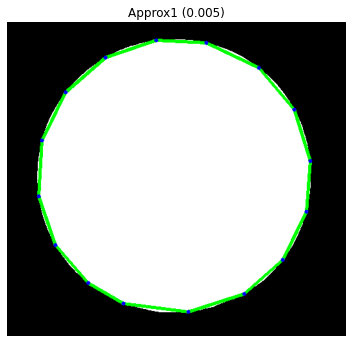

TGPRZ


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/binary.jpg') #경로만 바꾸면 돼 
img1 = img.copy()
img2 = img.copy()
img3 = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
cv2.drawContours(img, [cnt], -1, (255, 255, 0), 2)

epsilon1 = 0.005 * cv2.arcLength(cnt, True)

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)

print('Approx1 Contour 갯수', len(approx1))

cv2.drawContours(img1, [approx1], -1, (0, 255, 0), 3)

titles = ['Approx1 (0.005)']
images = [img1]
approx = [approx1]

for index in range(1):
    for i in range(len(approx[index])):
        for j in range(len(approx[index][i])):
            cv2.circle(images[index], (approx[index][i][j][0], approx[index][i][j][1]), 3, (0, 0, 255), -1)

plt.figure(figsize=(5, 5))
for i in range(1):
    plt.subplot(1, 1, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

print("TGPRZ")